# Moving Average

In [5]:
import numpy as np

def moving_average(d,extra_periods,n=3):
    #Historical period length
    cols = len(d)
    #Append np.nan into the demand array to cover future periods
    d = np.append(d,[np.nan]*extra_periods)
    #Define the forecast array
    f = np.full(cols+extra_periods,np.nan)

    #Create all the t+1 forecast until end of historical period
    for t in range (n,cols):
        f[t]=np.mean(d[t-n:t])

    #Forecast for all extra periods
    f[t+1:]=np.mean(d[t-n+1:t+1])

    #Return a DataFrame with the deman, forecast and error
    df=pd.DataFrame.from_dict({'Demand':d,'Forecast':f,'Errod':d-f})

    return df


In [9]:
d =[28,19,18,13,19,16,19,18,13,16,16,16,11,18,15,13,15,13,11,13,10,12]

df=moving_average(d,extra_periods=4,n=3)

In [18]:
df.index.name = 'Periods'

<Axes: title={'center': 'Moving Average'}, xlabel='Periods'>

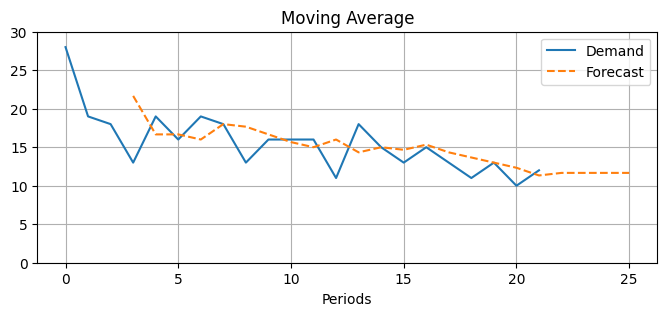

In [19]:
df[['Demand','Forecast']].plot(title="Moving Average",ylim=(0,30),style=['-','--'],figsize=(8,3),grid=True)